In [4]:
import pandas as pd
import plotly
import matplotlib.pyplot as mp
import plotly.plotly as py 
import plotly.graph_objs as go
import numpy as np
from plotly.graph_objs import *

import plotly.figure_factory as FF

In [6]:
triFree = pd.read_csv('../1milData/1mil3seedsData/triFree20-1srandcall-3randseeds-trial1.csv', sep=',')

triangles = pd.read_csv('../1milData/1mil3seedsData/triGraph20-1srandcall-3randseeds-trial1.csv', sep=',')

noGroups = pd.read_csv('../1milData/1mil3seedsData/noGroups20-1srandcall-3randseeds-trial1.csv', sep=',')

In [3]:
triFree['PortionInf'] = triFree['NumInfected']/triFree['NumNodes']
triFree['InfRate'] = triFree['InfRate']/10000

triangles['PortionInf'] = triangles['NumInfected']/triangles['NumNodes']
triangles['InfRate'] = triangles['InfRate']/10000

noGroups['PortionInf'] = noGroups['NumInfected']/noGroups['NumNodes']
noGroups['InfRate'] = noGroups['InfRate']/10000

In [4]:
triFree_NoDiseaseSpreadFilter = triFree['NumInfected'] == 3
triangles_NoDiseaseSpreadFilter = triangles['NumInfected'] == 3
noGroups_NoDiseaseSpreadFilter = noGroups['NumInfected'] == 3

In [5]:
triFree_NoDiseaseSpreadCount = triFree[triFree_NoDiseaseSpreadFilter]
triangles_NoDiseaseSpreadCount = triangles[triangles_NoDiseaseSpreadFilter]
noGroups_NoDiseaseSpreadCount = noGroups[noGroups_NoDiseaseSpreadFilter]

In [6]:
triangles_NoDiseaseSpreadCount.tail()

,NumNodes,GroupSize,AvgDeg,NumSeed,InfRate,NumInfected,PortionInf
167,1000000,30,20,3,0.05,3,0.000003
180,1000000,30,20,3,0.06,3,0.000003
208,1000000,30,20,3,0.06,3,0.000003
215,1000000,30,20,3,0.07,3,0.000003
389,1000000,30,20,3,0.12,3,0.000003


In [7]:
triFree_NoDiseaseSpreadCount = triFree_NoDiseaseSpreadCount[['InfRate', 'NumInfected']]
triangles_NoDiseaseSpreadCount = triangles_NoDiseaseSpreadCount[['InfRate', 'NumInfected']]
noGroups_NoDiseaseSpreadCount = noGroups_NoDiseaseSpreadCount[['InfRate', 'NumInfected']]


In [8]:
triFree_NoDiseaseSpreadCount = triFree_NoDiseaseSpreadCount.groupby('InfRate').count()
triangles_NoDiseaseSpreadCount = triangles_NoDiseaseSpreadCount.groupby('InfRate').count()
noGroups_NoDiseaseSpreadCount = noGroups_NoDiseaseSpreadCount.groupby('InfRate').count()

In [11]:
noGroups_NoDiseaseSpreadCount.head(7)

,NumInfected
InfRate,
0.00,30
0.01,10
0.02,7
0.03,4
0.04,2
0.05,1


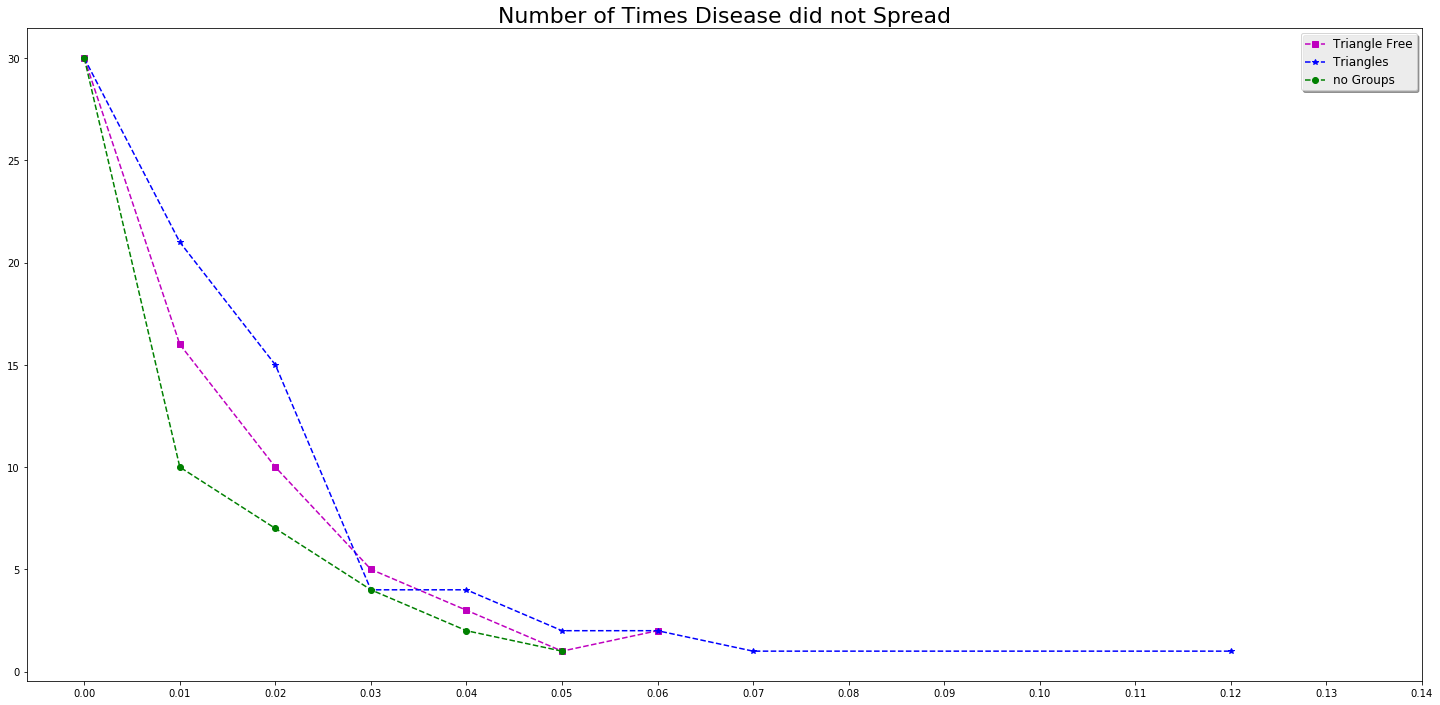

In [10]:
mp.figure(figsize=(25,12))
mp.title('Number of Times Disease did not Spread', fontsize=22)

mp.plot(triFree_NoDiseaseSpreadCount, 'ms--', label='Triangle Free')
mp.plot(triangles_NoDiseaseSpreadCount, 'b*--', label='Triangles')
mp.plot(noGroups_NoDiseaseSpreadCount, 'go--', label='no Groups')
mp.xticks(np.arange(0, .15, .01))
legend = mp.legend(loc='upper right', shadow=True)
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)
mp.show()

In [11]:
triFree_cutNoDiseaseSpreadFilter = triFree['NumInfected'] > 3
triangles_cutNoDiseaseSpreadFilter = triangles['NumInfected'] > 3
noGroups_cutNoDiseaseSpreadFilter = noGroups['NumInfected'] > 3

In [12]:
triFree_cutNoDiseaseSpread = triFree[triFree_cutNoDiseaseSpreadFilter]
triangles_cutNoDiseaseSpread = triangles[triangles_cutNoDiseaseSpreadFilter]
noGroups_cutNoDiseaseSpread = noGroups[noGroups_cutNoDiseaseSpreadFilter]

In [13]:
triFree_cutNoDiseaseSpread = triFree_cutNoDiseaseSpread[['InfRate', 'NumInfected']]
triangles_cutNoDiseaseSpread = triangles_cutNoDiseaseSpread[['InfRate', 'NumInfected']]
noGroups_cutNoDiseaseSpread = noGroups_cutNoDiseaseSpread[['InfRate', 'NumInfected']]

In [14]:
triFree_cutNoDiseaseSpread = triFree_cutNoDiseaseSpread.groupby('InfRate').mean()
triangles_cutNoDiseaseSpread = triangles_cutNoDiseaseSpread.groupby('InfRate').mean()
noGroups_cutNoDiseaseSpread = noGroups_cutNoDiseaseSpread.groupby('InfRate').mean()

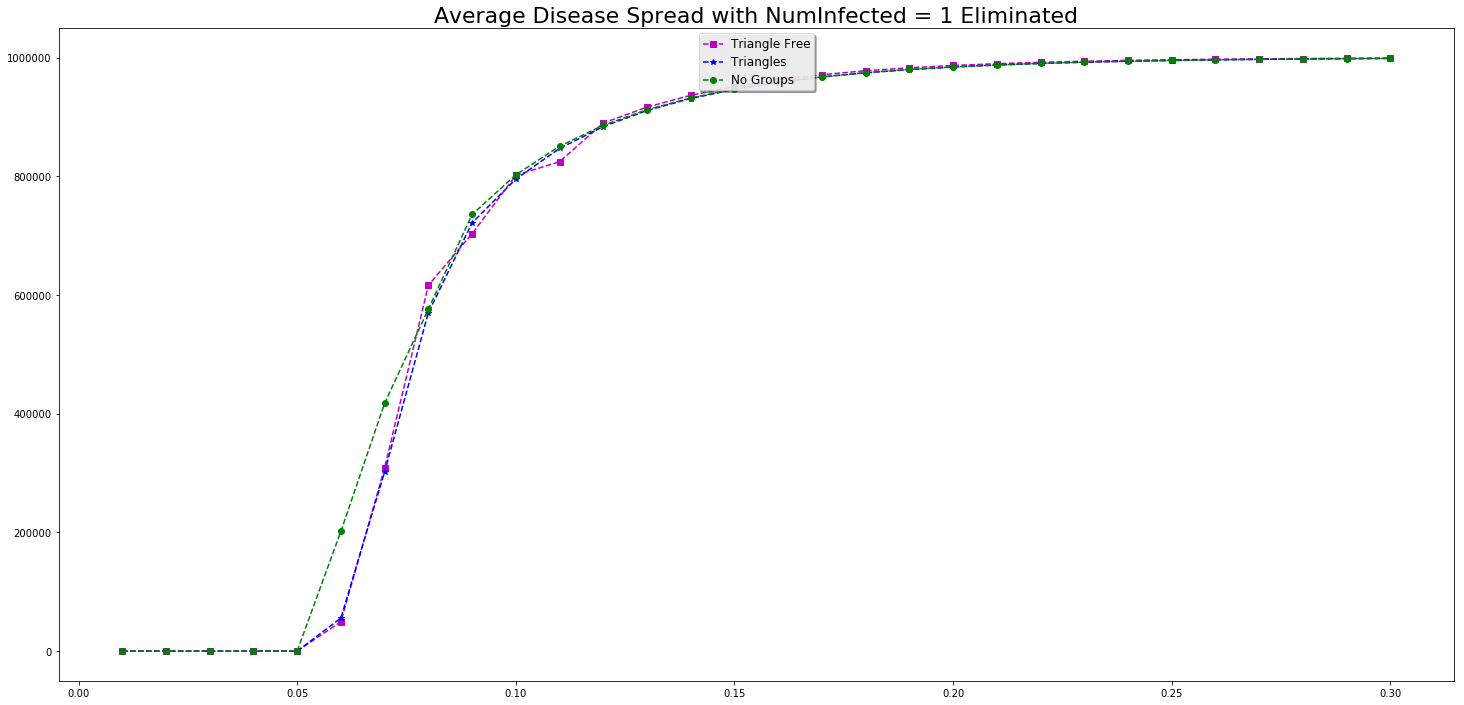

In [15]:
mp.figure(figsize=(25,12))
mp.title('Average Disease Spread with NumInfected = 1 Eliminated', fontsize=22)

mp.plot(triFree_cutNoDiseaseSpread[:.3], 'ms--', label='Triangle Free')
mp.plot(triangles_cutNoDiseaseSpread[:.3], 'b*--', label='Triangles')
mp.plot(noGroups_cutNoDiseaseSpread[:.3], 'go--', label='No Groups')

legend = mp.legend(loc='upper center', shadow=True)
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)
mp.show()

In [16]:
triFree_10DiseaseSpreadFilter = triFree['NumInfected'] >= 10
triangles_10DiseaseSpreadFilter = triangles['NumInfected'] >= 10
noGroups_10DiseaseSpreadFilter = noGroups['NumInfected'] >= 10

In [17]:
triFree_cut10DiseaseSpread = triFree[triFree_10DiseaseSpreadFilter]
triangles_cut10DiseaseSpread = triangles[triangles_10DiseaseSpreadFilter]
noGroups_cut10DiseaseSpread = noGroups[noGroups_10DiseaseSpreadFilter]

In [18]:
triFree_cut10DiseaseSpread = triFree_cut10DiseaseSpread[['InfRate', 'NumInfected']]
triangles_cut10DiseaseSpread = triangles_cut10DiseaseSpread[['InfRate', 'NumInfected']]
noGroups_cut10DiseaseSpread = noGroups_cut10DiseaseSpread[['InfRate', 'NumInfected']]

In [19]:
triFree_cut10DiseaseSpread = triFree_cut10DiseaseSpread.groupby('InfRate').mean()
triangles_cut10DiseaseSpread = triangles_cut10DiseaseSpread.groupby('InfRate').mean()
noGroups_cut10DiseaseSpread = noGroups_cut10DiseaseSpread.groupby('InfRate').mean()

In [20]:
triFree_cut10DiseaseSpread.head(11)

,NumInfected
InfRate,
0.03,21.500000
0.04,15.833333
0.05,36.100000
0.06,57817.625000
0.07,370558.240000
0.08,616259.733333
0.09,727439.758621
0.10,801582.300000
0.11,824507.600000


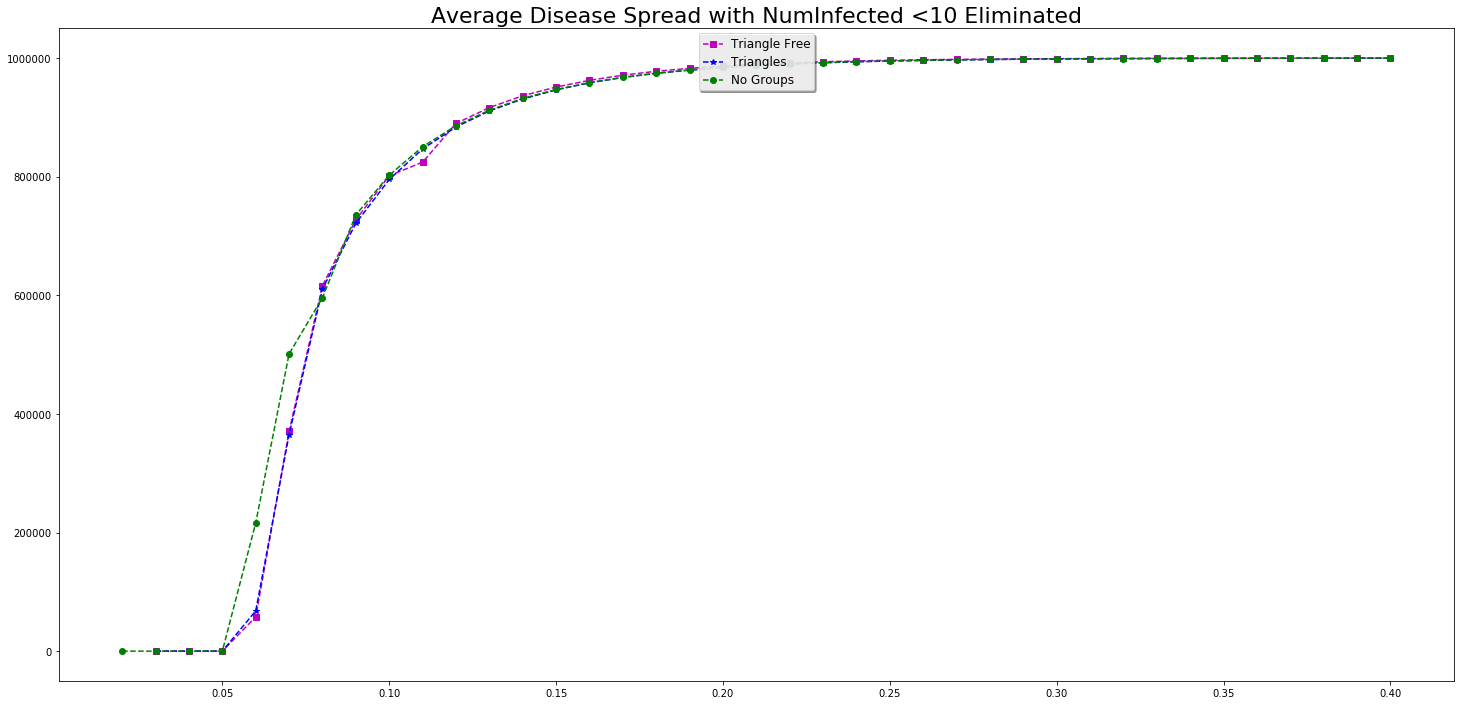

In [22]:
mp.figure(figsize=(25,12))
mp.title('Average Disease Spread with NumInfected <10 Eliminated', fontsize=22)

mp.plot(triFree_cut10DiseaseSpread, 'ms--', label='Triangle Free')
mp.plot(triangles_cut10DiseaseSpread, 'b*--', label='Triangles')
mp.plot(noGroups_cut10DiseaseSpread, 'go--', label='No Groups')

legend = mp.legend(loc='upper center', shadow=True)
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)
mp.show()